<a href="https://colab.research.google.com/github/puritym8/Python-Data-Analysis/blob/main/US_Consumer_Finance_Complaints_Basic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the necessary libraries**

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**import the Consumer Complaints Dataset**

In [7]:
df = pd.read_csv('/content/drive/MyDrive/consumer_complaints.csv')
df

<ipython-input-7-33bb659c76f9>:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/consumer_complaints.csv')


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529
555953,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550
555955,04/14/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963


In [6]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [14]:
df.isnull().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [29]:
df.isnull().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [30]:
data = df.drop(['sub_product','sub_issue','consumer_complaint_narrative','company_public_response','tags','consumer_consent_provided'], axis=1)

data.head()

,date_received,product,issue,company,state,zipcode,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,11764,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Repaying your loan,"Navient Solutions, Inc.",MD,21402,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,False statements or representation,Resurgent Capital Services L.P.,GA,30106,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [31]:
data.isnull().sum()

date_received                      0
product                            0
issue                              0
company                            0
state                           4887
zipcode                         4505
submitted_via                      0
date_sent_to_company               0
company_response_to_consumer       0
timely_response                    0
consumer_disputed?                 0
complaint_id                       0
dtype: int64

In [32]:
data.shape

(555957, 12)

In [33]:
data.describe()

,complaint_id
count,5.559570e+05
mean,9.600510e+05
std,5.504296e+05
min,1.000000e+00
25%,4.863230e+05
50%,9.737830e+05
75%,1.441702e+06
max,1.895894e+06


In [35]:
data.dtypes

date_received                   object
product                         object
issue                           object
company                         object
state                           object
zipcode                         object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [39]:
data['date_received'] = pd.to_datetime(data['date_received'])
data.head(3)

,date_received,product,issue,company,state,zipcode,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,2013-08-30,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,2013-08-30,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,11764,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473


**Number of complaints by product**

In [41]:
data['product'].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

Mortgage and Debt collection are the products with the most complaints.


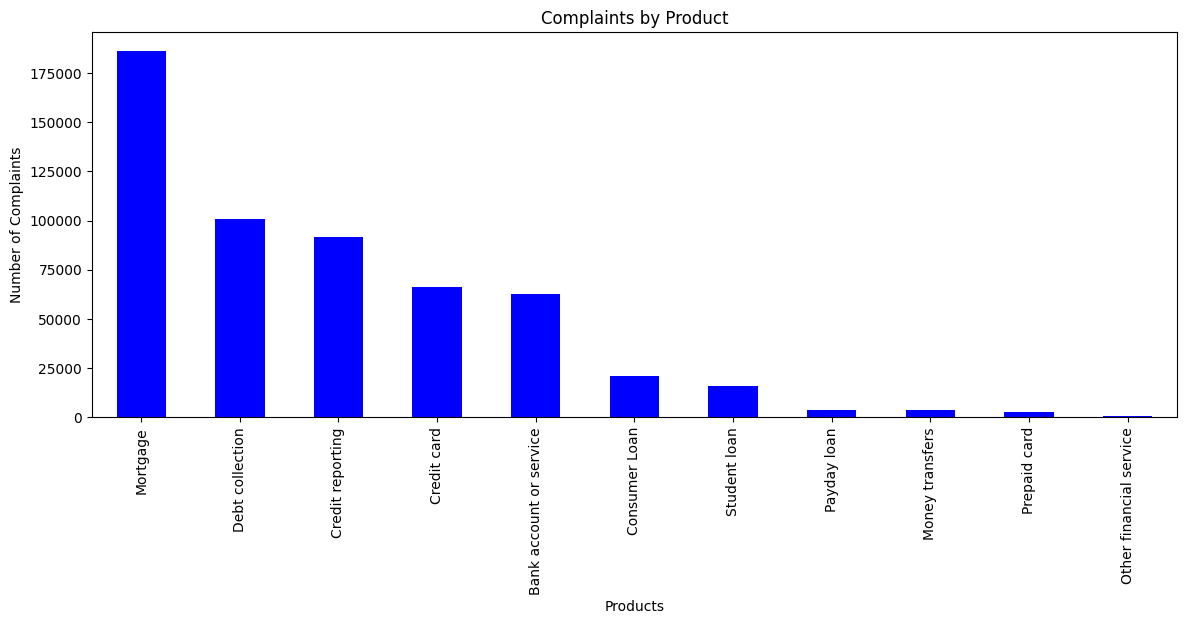

In [45]:
plt.figure(figsize = (14,5))
data['product'].value_counts().plot(kind='bar', color=['blue'])
plt.title('Complaints by Product')
plt.xlabel('Products')
plt.ylabel('Number of Complaints')
plt.show()



**Number of complaints by Companies**

In [48]:
data['company'].nunique()

3605

we sample the first 10 comapnies

In [50]:
data['company'].value_counts().head(10)

Bank of America                           55998
Wells Fargo & Company                     42024
JPMorgan Chase & Co.                      33881
Equifax                                   31828
Experian                                  30905
Citibank                                  25540
TransUnion Intermediate Holdings, Inc.    25534
Ocwen                                     20978
Capital One                               15628
Nationstar Mortgage                       13250
Name: company, dtype: int64

Bank of America has the most complaints, followed by Wells Fargo and company and then JPMorgan Chase and Co.

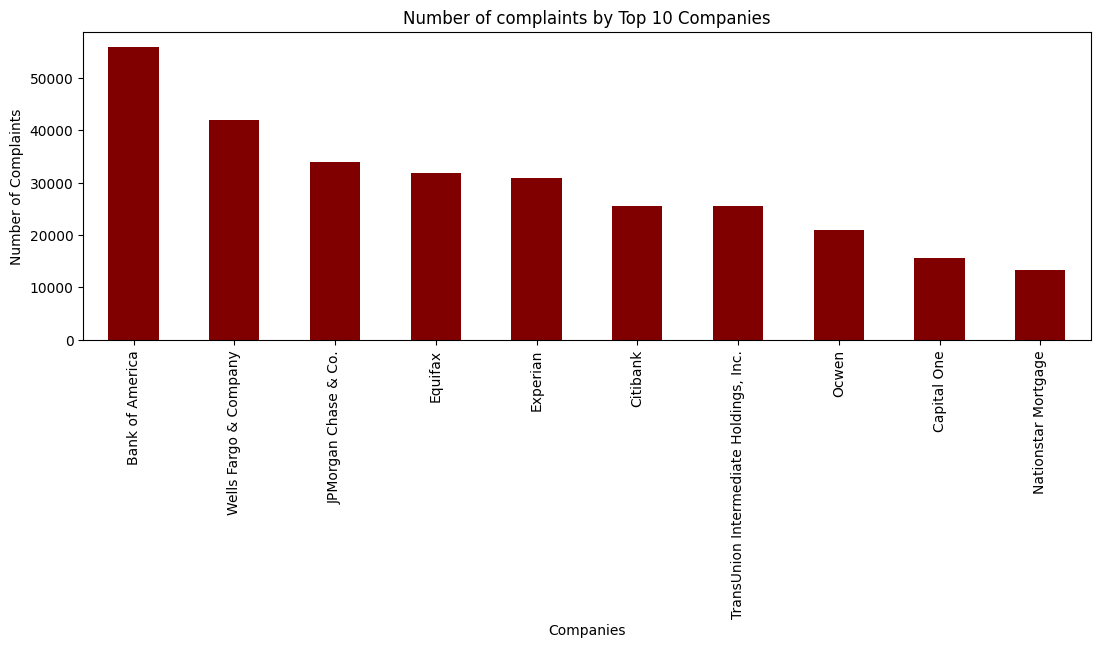

In [51]:
plt.figure(figsize = (13,4))
data['company'].value_counts().head(10).plot(kind='bar', color=['maroon'])
plt.title('Number of complaints by Top 10 Companies')
plt.xlabel('Companies')
plt.ylabel('Number of Complaints')
plt.show()

In [53]:
data.head(2)

,date_received,product,issue,company,state,zipcode,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,2013-08-30,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080


We understand the number of unique issues raised

In [54]:
data['issue'].nunique()

95

We analyze what were the top 10 issues raised

In [58]:
data['issue'].value_counts().head(10)

Loan modification,collection,foreclosure    97191
Incorrect information on credit report      66718
Loan servicing, payments, escrow account    60375
Cont'd attempts collect debt not owed       42285
Account opening, closing, or management     26661
Communication tactics                       18293
Disclosure verification of debt             18292
Deposits and withdrawals                    17195
Application, originator, mortgage broker    13306
Billing disputes                            11042
Name: issue, dtype: int64

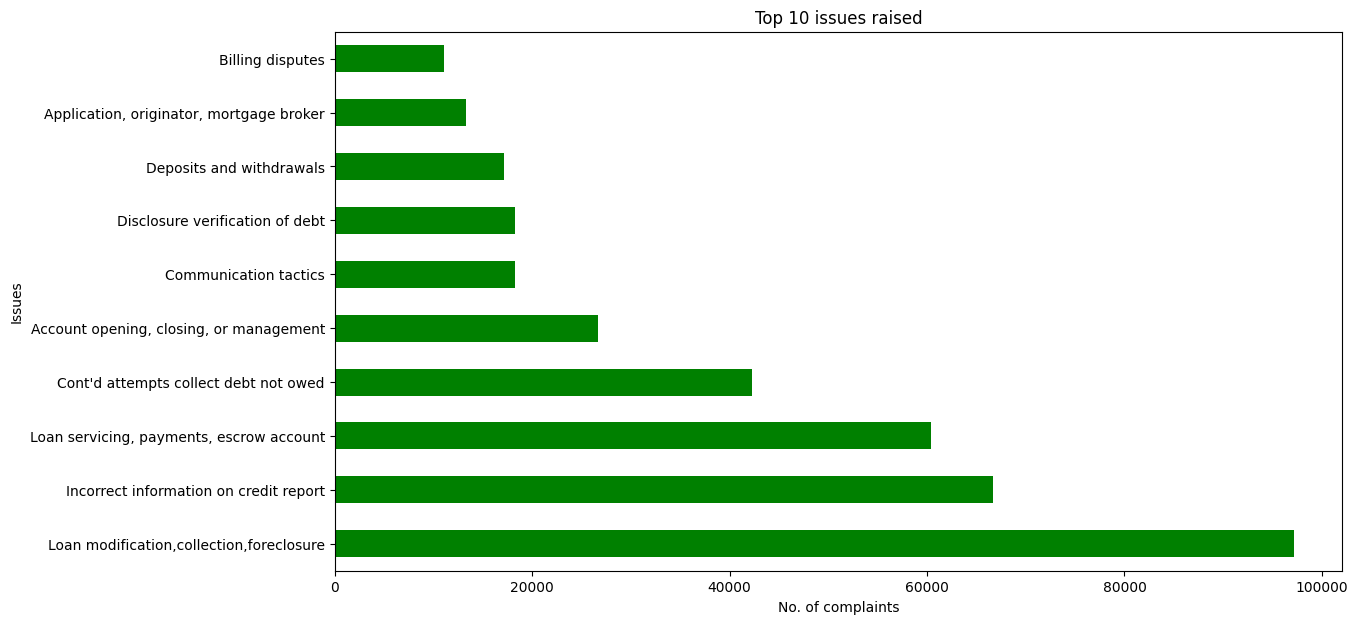

In [64]:
plt.figure(figsize = (13,7))
data['issue'].value_counts().head(10).plot(kind='barh', color=['green'])
plt.title('Top 10 issues raised')
plt.xlabel('No. of complaints')
plt.ylabel('Issues')
plt.show()

In [68]:
data['company_response_to_consumer'].value_counts()

Closed with explanation            404293
Closed with non-monetary relief     70237
Closed with monetary relief         38262
Closed without relief               17909
Closed                              13399
Closed with relief                   5305
In progress                          3763
Untimely response                    2789
Name: company_response_to_consumer, dtype: int64

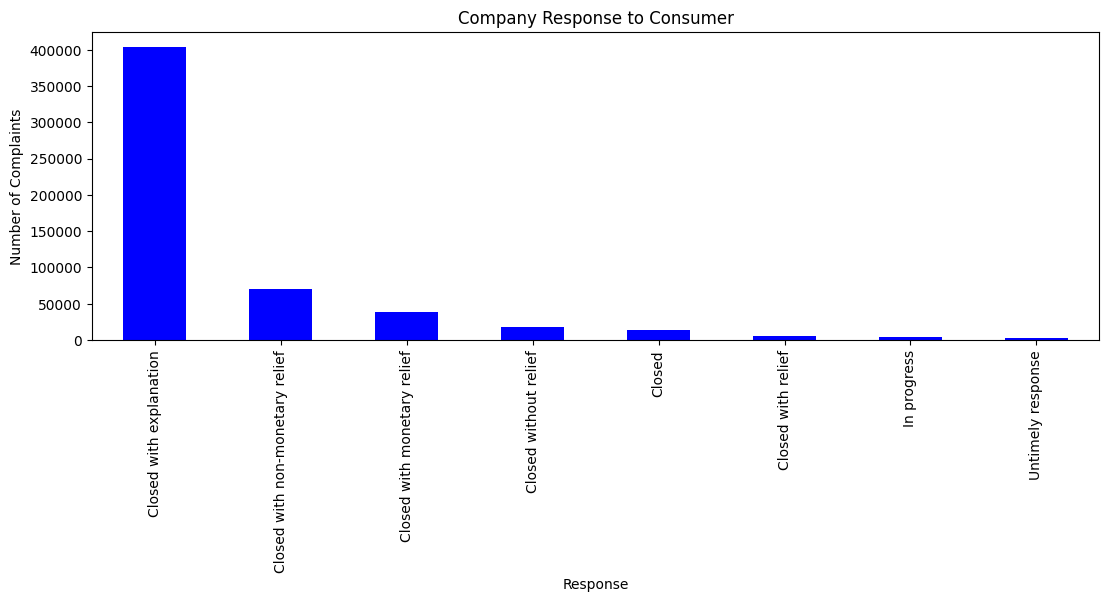

In [69]:
plt.figure(figsize = (13,4))
data['company_response_to_consumer'].value_counts().plot(kind='bar', color=['blue'])
plt.title('Company Response to Consumer')
plt.xlabel('Response')
plt.ylabel('Number of Complaints')
plt.show()

The highest number of complaints raised were closed with an explanation to the client

In [73]:
data.head(3)

,date_received,product,issue,company,state,zipcode,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,2013-08-30,Mortgage,"Loan modification,collection,foreclosure",U.S. Bancorp,CA,95993,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,"Loan servicing, payments, escrow account",Wells Fargo & Company,CA,91104,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,2013-08-30,Credit reporting,Incorrect information on credit report,Wells Fargo & Company,NY,11764,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473


To find the means used to submit the complaints

In [80]:
data['submitted_via'].value_counts().head(10)

Web            361338
Referral       109379
Phone           40026
Postal mail     36752
Fax              8118
Email             344
Name: submitted_via, dtype: int64

Highest number of complaints were submitted via Web

In [82]:
data['timely_response'].value_counts()

Yes    541909
No      14048
Name: timely_response, dtype: int64

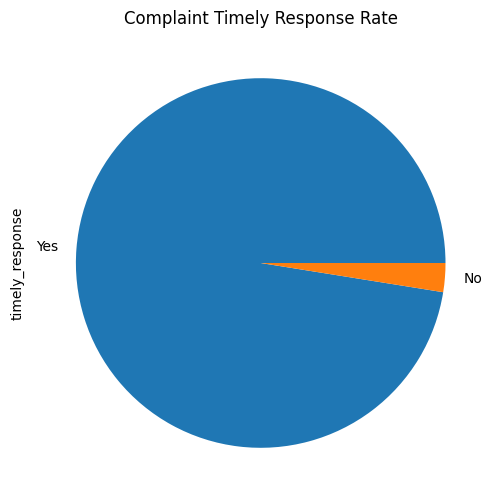

In [85]:
data['timely_response'].value_counts().plot.pie(subplots=True, figsize=(11, 6))
plt.title('Complaint Timely Response Rate')
plt.show()

In [93]:
new_data = data.groupby('company')['product'].value_counts().head(10)
new_data

company                                      product        
(Former)Shapiro, Swertfeger & Hasty, LLP     Debt collection     2
                                             Mortgage            2
1st 2nd Mortgage Company Of NJ, Inc.         Mortgage            1
1st Alliance Lending                         Mortgage           11
                                             Debt collection     2
1st Capital Finance of South Carolina, Inc.  Debt collection     1
1st Capital Mortgage, LLC                    Mortgage            1
1st Fidelity Loan Servicing                  Mortgage            3
                                             Debt collection     2
1st Franklin Financial Corporation           Consumer Loan      24
Name: product, dtype: int64